170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


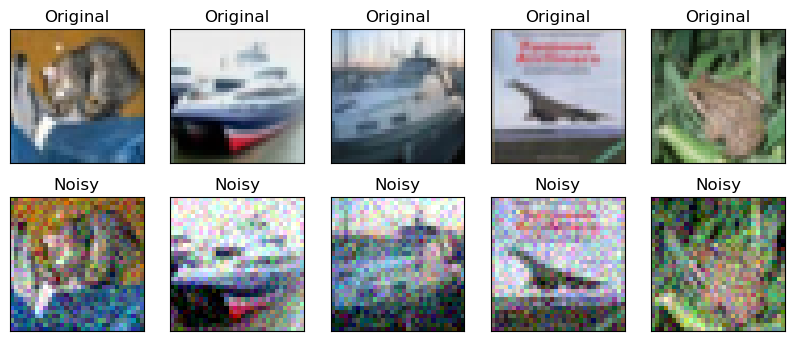

In [4]:
#dataset preparation
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess images by normalizing pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Function to add random noise to images
def add_noise(images, noise_factor=0.1):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Clip values to range [0, 1]
    return noisy_images

# Add random noise to training and testing images
noise_factor = 0.1
x_train_noisy = add_noise(x_train, noise_factor)
x_test_noisy = add_noise(x_test, noise_factor)

# Display a few original and noisy images
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - loss: 0.6064 - val_loss: 0.5684
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - loss: 0.5676 - val_loss: 0.5655
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.5644 - val_loss: 0.5642
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - loss: 0.5636 - val_loss: 0.5635
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - loss: 0.5625 - val_loss: 0.5627
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.5621 - val_loss: 0.5621
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - loss: 0.5616 - val_loss: 0.5616
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - loss: 0.5606 - val_loss: 0.5613
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.5601 - val_loss: 0.5611
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - loss: 0.5602 - val_loss: 0.5609
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


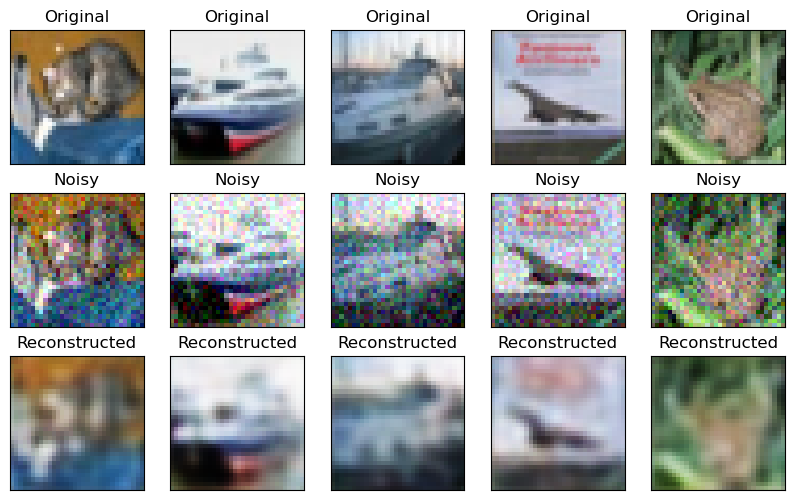

In [5]:
#model architecture
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Preprocess images by normalizing pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add random noise to images
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  # Clip values to range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define autoencoder architecture
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded_output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Reconstruct clean images from noisy test images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Display a few original, noisy, and reconstructed images
n = 5
plt.figure(figsize=(10, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructed_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - loss: 0.0082 - val_loss: 0.0049
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.0044 - val_loss: 0.0045


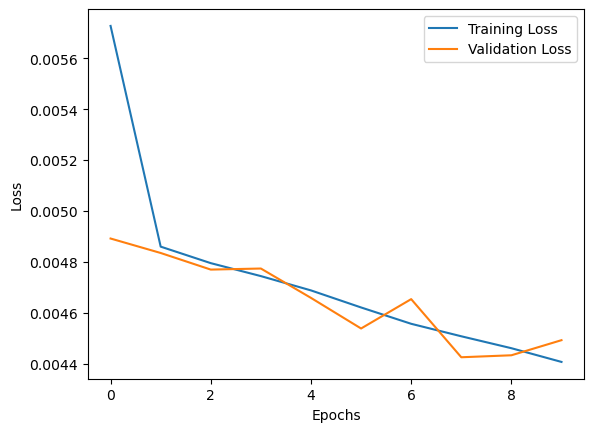

In [6]:
#model training
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Define the loss function and optimizer
loss_function = MeanSquaredError()
optimizer = Adam()

# Compile the autoencoder model
autoencoder.compile(optimizer=optimizer, loss=loss_function)

# Train the model on noisy images to reconstruct clean versions
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Average MSE: 0.004489274128315285
Average SSIM: 0.9998853580403609


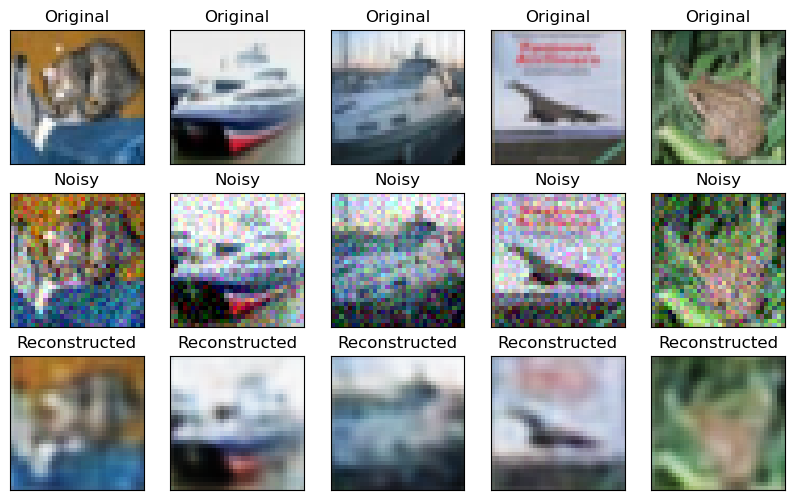

In [12]:
#model evaluation
import numpy as np
from skimage.metrics import mean_squared_error, structural_similarity
import cv2

# Evaluate the model on a separate set of noisy images
reconstructed_images = autoencoder.predict(x_test_noisy)

mse_scores = []
ssim_scores = []

for i in range(len(x_test)):
    mse = mean_squared_error(x_test[i], reconstructed_images[i])
    ssim = structural_similarity(cv2.cvtColor(x_test[i], cv2.COLOR_RGB2GRAY),
                                 cv2.cvtColor(reconstructed_images[i], cv2.COLOR_RGB2GRAY),
                                 data_range=255)  # Specify data_range as 255 for RGB images
    mse_scores.append(mse)
    ssim_scores.append(ssim)
# Calculate average scores
average_mse = np.mean(mse_scores)
average_ssim = np.mean(ssim_scores)
print("Average MSE:", average_mse)
print("Average SSIM:", average_ssim)

# Visualize a few original, noisy, and reconstructed images
n = 5
plt.figure(figsize=(10, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()